<a href="https://colab.research.google.com/github/axpat/hotel_booking-EDA-notebook/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### **`Solution Work:`**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [ ]:
# setting configuration for our plots
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter /Capstone Project/Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

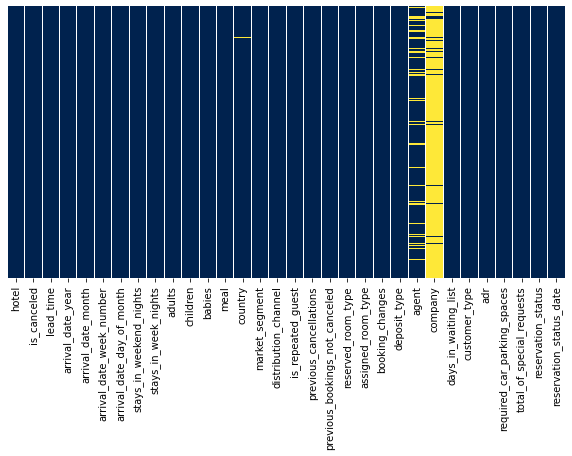

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

**Dropping Company column as it comprises of the major chunk of null values**

In [ ]:
df.drop('company', axis=1, inplace=True)

# Replacing Nan values in agent by median values.

In [ ]:
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
df['agent'] = df['agent'].transform(impute_median)

# Replacing Nan Values in country by mode.

In [ ]:
print(df['country'].mode())

0    PRT
dtype: object


In [ ]:
df['country'].fillna(str(df['country'].mode().values[0]), inplace=True)

# Creating a heatmap for modified Dataframe

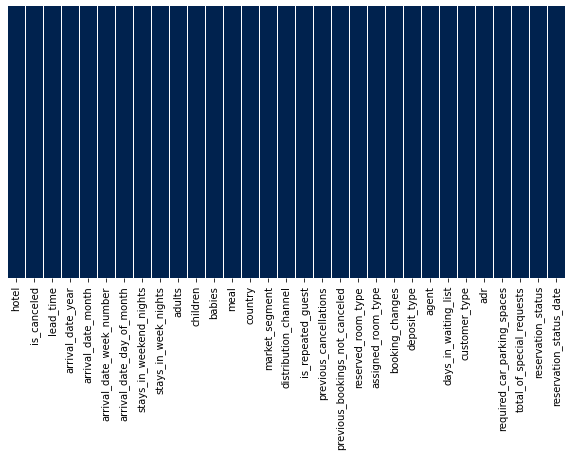

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

Creating a copy of a dataframe for performing **operations**

In [ ]:
# Here I copied a new dataframe from our original dataframe so that we can change column names according to our convinience in the plot.
df2 = df.copy()
df2.rename(columns={'arrival_date_year':'year'}, inplace=True)

# **Now that we've got all the necessary tools and gadgets .Lets explore the space for multiverse.**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Here I copied a new dataframe from our original dataframe so that we can change column names according to our convinience in the plot.
df2 = df.copy()
df2.rename(columns={'arrival_date_year':'year'}, inplace=True)

In [ ]:
booking_count = df2.groupby(['hotel','year']).hotel.count().unstack()

In [ ]:
selected_columns= ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

Creating a copy so as not to disturb original dataset.

In [ ]:
bookings_df = df[selected_columns].copy()

Dropping babies column as they are not accounted into monetary aspects.

In [ ]:
bookings_df['Total_Guests'] = bookings_df['adults'] + bookings_df['children']

Removing rows which contain total guests as Zero.

In [ ]:
bookings_df= bookings_df[bookings_df.Total_Guests > 0]

**Let's explore types of hotels**



In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# selecting only those rows which have donot have booking cancellations.
df= df[df.is_canceled == 0]
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
90951,City Hotel,0,5,2016,June,25,13,1,0,3,...,0,No Deposit,9.0,0,Transient,137.0,0,3,Check-Out,2016-06-14


In [ ]:
resorthotel_df = df [df.hotel == "Resort Hotel"]
cityhotel_df= df [df.hotel == "City Hotel"]

In [ ]:
resorthotel_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,1,No Deposit,143.0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,0,No Deposit,250.0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,0,No Deposit,250.0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,0,No Deposit,40.0,0,Contract,112.80,0,1,Check-Out,2017-09-14


Bookings cancelled based on hotel type

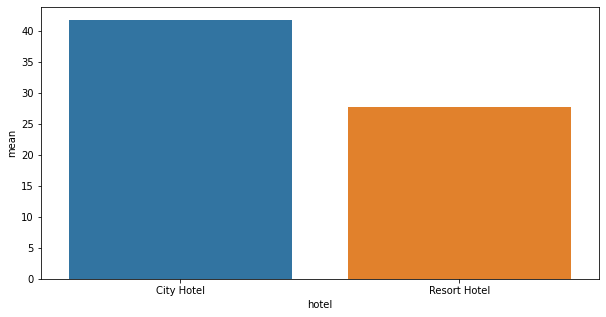

In [ ]:
a = bookings_df.groupby("hotel")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

Visualizing Monthly bookings and monthly cancellations

In [52]:
# taking different values of months count into account.
df_new= df.copy()
df_new['no_of_bookings']= 1
df_new.loc[(df_new.arrival_date_month== 'July')| (df_new.arrival_date_month== 'August'),'no_of_bookings']/=3
df_new.loc[~((df_new.arrival_date_month== 'July')| (df_new.arrival_date_month== 'August')),'no_of_bookings']/=2
df_new.sample(100)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,no_of_bookings
35033,Resort Hotel,0,13,2017,April,15,11,0,1,1,...,No Deposit,240.0,0,Transient-Party,76.00,0,2,Check-Out,2017-04-12,0.500000
15770,Resort Hotel,0,50,2015,July,31,28,0,5,2,...,No Deposit,240.0,0,Transient,198.80,1,1,Check-Out,2015-08-02,0.333333
113423,City Hotel,0,18,2017,June,23,5,1,1,2,...,No Deposit,14.0,0,Transient,140.00,0,2,Check-Out,2017-06-07,0.500000
18470,Resort Hotel,0,0,2015,November,47,17,0,4,1,...,No Deposit,14.0,0,Transient-Party,42.00,0,0,Check-Out,2015-11-21,0.500000
118314,City Hotel,0,77,2017,August,33,14,1,3,3,...,No Deposit,9.0,0,Transient,200.00,0,2,Check-Out,2017-08-18,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999,Resort Hotel,0,65,2016,November,46,8,0,4,2,...,No Deposit,240.0,0,Transient,37.80,0,1,Check-Out,2016-11-12,0.500000
16539,Resort Hotel,0,67,2015,August,35,23,4,6,2,...,No Deposit,14.0,0,Transient,137.65,0,1,Check-Out,2015-09-02,0.333333
111703,City Hotel,0,35,2017,May,19,10,0,4,2,...,No Deposit,39.0,0,Transient-Party,140.00,0,0,Check-Out,2017-05-14,0.500000
98355,City Hotel,0,61,2016,December,50,5,1,2,1,...,No Deposit,7.0,0,Transient,67.91,0,2,Check-Out,2016-12-08,0.500000


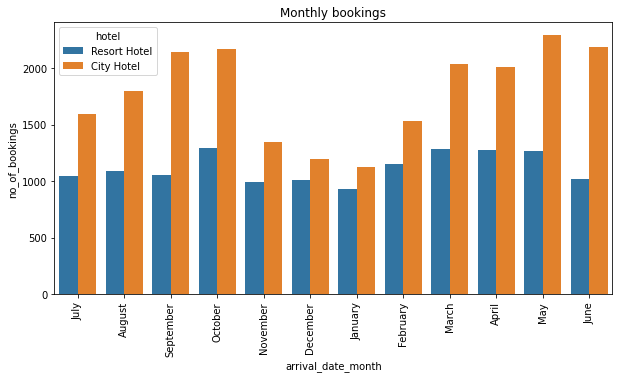

In [53]:
#month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_new['hotel'], estimator= sum, data= df_new)
plt.xticks(rotation = 90)
plt.show()

In [54]:
 df[['hotel', 'arrival_date_month']]

,hotel,arrival_date_month
0,Resort Hotel,July
1,Resort Hotel,July
2,Resort Hotel,July
3,Resort Hotel,July
4,Resort Hotel,July
...,...,...
119385,City Hotel,August
119386,City Hotel,August
119387,City Hotel,August
119388,City Hotel,August
